<a href="https://colab.research.google.com/github/philipilono/face-alignment-model/blob/main/face_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import os
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/faces_dataset.zip

Archive:  gdrive/My Drive/faces_dataset.zip
   creating: faces_dataset/
  inflating: faces_dataset/face_images.npz  
  inflating: faces_dataset/facial_keypoints.csv  


In [ ]:
npz_data = np.load('faces_dataset/face_images.npz')


#to verify that the data outputs the correct values
raw_data = npz_data.files
for item in raw_data:
  print(item)


print(npz_data['face_images'].shape)
print(npz_data['face_images'].dtype)

face_images
(96, 96, 7049)
float64


In [ ]:
face_set = np.moveaxis(npz_data['face_images'], -1, 0)
face_set.shape

(7049, 96, 96)

In [ ]:
face_set[0]

array([[238., 236., 237., ..., 250., 250., 250.],
       [235., 238., 236., ..., 249., 250., 251.],
       [237., 236., 237., ..., 251., 251., 250.],
       ...,
       [186., 183., 181., ...,  52.,  57.,  60.],
       [189., 188., 207., ...,  61.,  69.,  78.],
       [191., 184., 184., ...,  70.,  75.,  90.]])

In [ ]:
my_dir = os.path.join('CelebA/Img/img_align_celeba')
csv_dir = 'faces_dataset/facial_keypoints.csv'

landmarks = pd.read_csv(csv_dir)

landmarks_list = landmarks.columns.tolist()#
print(landmarks.isnull().sum())

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
landmarks.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [ ]:
new_landmarks = landmarks.dropna()
len(new_landmarks)

2140

In [ ]:
idx = new_landmarks.index.tolist()
new_face_set = face_set[idx]
new_face_set.shape

(2140, 96, 96)

In [ ]:
lm = new_landmarks.values
lm.shape

(2140, 30)

In [ ]:
face_images = new_face_set.reshape(new_face_set.shape[0], 96, 96, 1)#ensures images are grayscale
face_images.shape

(2140, 96, 96, 1)

In [ ]:
horizontal_flip = True
sample = 50

In [ ]:
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap='gray')
    axis.scatter(keypoint[0::2], keypoint[1::2], marker='*', s=20)
    plt.title(title)

#code copied from: https://www.kaggle.com/code/apurvachoudhary/landmark-detection

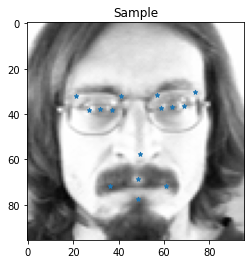

In [ ]:
fig, axis = plt.subplots()
plot_sample(face_images[170], lm[170], axis, "Sample")

In [ ]:
def flip(images, lm):
  flipped_image = np.copy(images)
  flipped_lm = np.copy(lm)

  flipped_image = np.flip(images, axis = 2)

  flipped_lm[:,0] = images.shape[1] - flipped_lm[:,0] - 1

  return flipped_image, flipped_lm

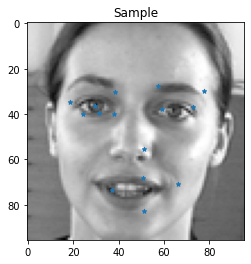

In [ ]:
flipped_image, flipped_lm = flip(face_images, lm)
fig, axis = plt.subplots()
plot_sample(flipped_image[20], flipped_lm[20], axis, "Sample")

In [ ]:
mod_images = np.concatenate((face_images, flipped_image))
mod_lm = np.concatenate((lm, flipped_lm))

print(mod_images.shape)
print(mod_lm.shape)

(4280, 96, 96, 1)
(4280, 30)


In [ ]:
bright_lm = lm
def Bright(images):
  bright_images = []
  seed = (1,2)
  for image in images:
    bright_image = np.asarray(tf.image.stateless_random_brightness(image, 0.2, seed))
    bright_images.append(bright_image.reshape(96, 96, 1))
  return bright_images  

In [ ]:
bright_images = Bright(face_images)
print(len(bright_images))

mod_images = np.concatenate((mod_images, bright_images))
mod_lm = np.concatenate((mod_lm, bright_lm))

print(mod_images.shape)
print(mod_lm.shape)

2140
(6420, 96, 96, 1)
(6420, 30)


In [ ]:
cont_lm = lm
def Contrast(images):
  light_images = []
  for image in images:
    light_image = np.asarray(tf.image.adjust_contrast(image, 1.2))
    light_images.append(light_image.reshape(96, 96, 1))
  return light_images  

In [ ]:
cont_images = Contrast(face_images)
print(len(cont_images))

mod_images = np.concatenate((mod_images, cont_images))
mod_lm = np.concatenate((mod_lm, cont_lm))

print(mod_images.shape)
print(mod_lm.shape)

2140
(8560, 96, 96, 1)
(8560, 30)


In [ ]:
noise_lm = lm
def Noise(images):
  noise_images = []

  for image in images:
    noise_image = np.asarray(cv2.GaussianBlur(image, (5,5), cv2.BORDER_DEFAULT))
    noise_images.append(noise_image.reshape(96, 96, 1))
  return noise_images

In [ ]:
noise_images = Noise(face_images)
print(len(noise_images))

mod_images = np.concatenate((mod_images, noise_images))
mod_lm = np.concatenate((mod_lm, noise_lm))

print(mod_images.shape)
print(mod_lm.shape)

2140
(10700, 96, 96, 1)
(10700, 30)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(mod_images, mod_lm, test_size = 0.2, random_state = 42) 

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8560, 96, 96, 1) (2140, 96, 96, 1) (8560, 30) (2140, 30)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
Y_train = Y_train / X_train.shape[1]
Y_test = Y_test / X_test.shape[1]

In [ ]:
Y_train.min(), Y_train.max(), X_train.shape[1]

(0.03985669850291667, 0.9980102408489584, 96)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AlphaDropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(96, 96, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))

model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))

model.add(Dropout(0.15))
model.add(Flatten())

model.add(Dropout(0.1))

model.add(Dense(512, activation='relu'))
model.add(Dense(30, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer= 'adam', metrics = ['accuracy', 'MeanAbsolutePercentageError'])
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 5, verbose = 1, mode = 'max')
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data = (X_test, Y_test), verbose = 1, callbacks = early)

Epoch 1/50
268/268 [==============================] - 20s 30ms/step - loss: 0.0024 - accuracy: 0.7063 - mean_absolute_percentage_error: 6.9939 - val_loss: 0.0013 - val_accuracy: 0.7290 - val_mean_absolute_percentage_error: 4.8914
Epoch 2/50
268/268 [==============================] - 8s 30ms/step - loss: 0.0010 - accuracy: 0.7369 - mean_absolute_percentage_error: 4.5236 - val_loss: 9.1428e-04 - val_accuracy: 0.7449 - val_mean_absolute_percentage_error: 4.4313
Epoch 3/50
268/268 [==============================] - 8s 29ms/step - loss: 7.4291e-04 - accuracy: 0.7791 - mean_absolute_percentage_error: 3.8343 - val_loss: 7.0276e-04 - val_accuracy: 0.7855 - val_mean_absolute_percentage_error: 3.6255
Epoch 4/50
268/268 [==============================] - 8s 29ms/step - loss: 5.6153e-04 - accuracy: 0.7968 - mean_absolute_percentage_error: 3.4127 - val_loss: 5.8634e-04 - val_accuracy: 0.7972 - val_mean_absolute_percentage_error: 3.3399
Epoch 5/50
268/268 [==============================] - 8s 28ms/s

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       7

67/67 [==============================] - 0s 5ms/step


Text(0.5, 0.98, 'x: Manual; +: CNN')

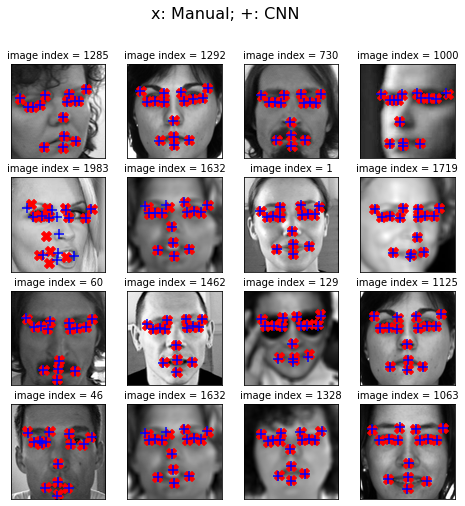

In [ ]:
Ytrain_pred = model.predict(X_train)
Ytest_pred = model.predict(X_test)

n = 0
nrows = 4
ncols = 4
irand=np.random.choice(Y_test.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(X_test[irand[n]].squeeze(-1), cmap='gray')
        ax[row,col].scatter(Y_test[irand[n],0::2]*96,Y_test[irand[n],1::2]*96,marker='X',c='r',s=100)
        ax[row,col].scatter(Ytest_pred[irand[n],0::2]*96,Ytest_pred[irand[n],1::2]*96,marker='+',c='b',s=100)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
        n += 1
plt.suptitle('x: Manual; +: CNN', fontsize=16)

#code copied from: https://www.kaggle.com/code/spsayakpaul/face-landmarks-with-cnn

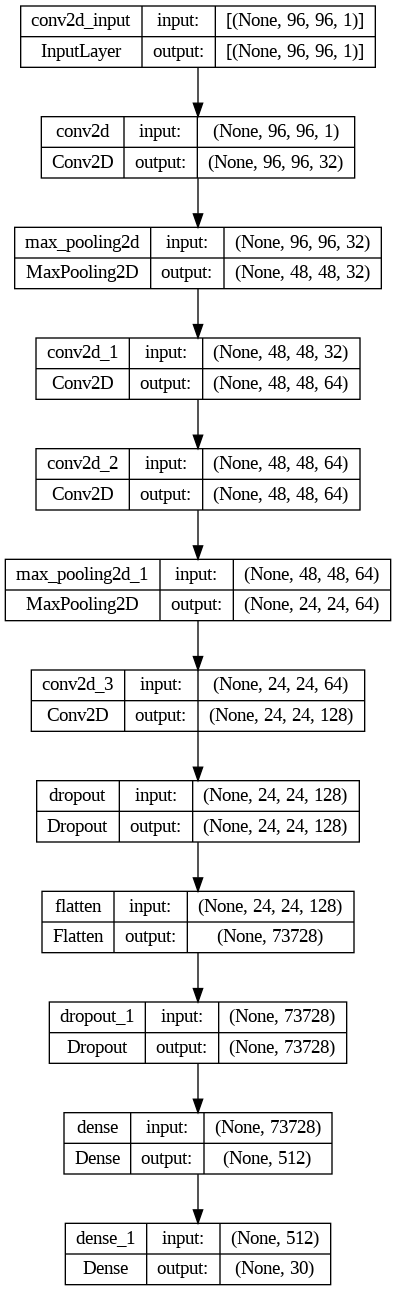

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

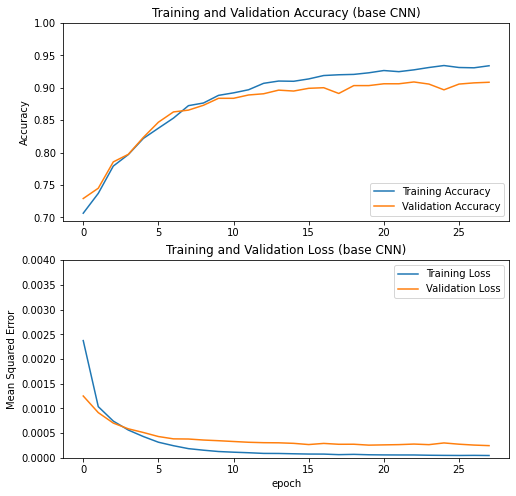

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy (base CNN)')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
plt.ylim([0,0.004])
plt.title('Training and Validation Loss (base CNN)')
plt.xlabel('epoch')
plt.show()

#Code modified from: https://www.tensorflow.org/tutorials/images/transfer_learning